In [2]:
from llama_cpp import Llama

llm = Llama.from_pretrained(repo_id="microsoft/Phi-3-mini-4k-instruct-gguf", filename= "*q4.gguf", 
                            n_gpu_layers = -1,
                            n_ctx=512,
                            max_tokens=20,
                            n_batch=512,
                            n_threads=16,
                            verbose=True,
                            flash_attn=True,
                            chat_format='chatml')

llama_model_loader: loaded meta data with 24 key-value pairs and 195 tensors from /home/zeus/.cache/huggingface/hub/models--microsoft--Phi-3-mini-4k-instruct-gguf/snapshots/c80d904a71b99a3eaeb8d3dbf164166384c09dc3/./Phi-3-mini-4k-instruct-q4.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = phi3
llama_model_loader: - kv   1:                               general.name str              = Phi3
llama_model_loader: - kv   2:                        phi3.context_length u32              = 4096
llama_model_loader: - kv   3:                      phi3.embedding_length u32              = 3072
llama_model_loader: - kv   4:                   phi3.feed_forward_length u32              = 8192
llama_model_loader: - kv   5:                           phi3.block_count u32              = 32
llama_model_loader: - kv   6:                  p

In [3]:
joke = "Why did the scarecrow win an award? Because he was outstanding in his field!"

schema = {
    "type": "object",
    "properties": {
        "rating": {
            "type": "number",
            "minimum": 0,
            "maximum": 4,
            "description": "The rating of the joke, from 0 to 4.",
        }
    },
}

llm.create_chat_completion(    
    messages=[
    {
        "role": "system",
        "content": f"You are a joke evaluator that answers in JSON. Here's the json schema you must adhere to:\n{schema}",
    },
    {"role": "user",
        "content": f""" Your task is to evaluate jokes based on their funniness on a scale from 0 to 4, 
                        where 0 represents the least funny and 4 represents the most funny. 
                        \n "{joke}" """},
],
#response_format= {"type": "json_object"}, #"schema": schema}, # uncomment this line to enforce the schema
temperature=0.2,
top_p=0.9,
max_tokens=10,
)


llama_print_timings:        load time =     324.34 ms
llama_print_timings:      sample time =       1.72 ms /    10 runs   (    0.17 ms per token,  5810.58 tokens per second)
llama_print_timings: prompt eval time =     324.07 ms /   198 tokens (    1.64 ms per token,   610.98 tokens per second)
llama_print_timings:        eval time =     115.54 ms /     9 runs   (   12.84 ms per token,    77.90 tokens per second)
llama_print_timings:       total time =     451.74 ms /   207 tokens


{'id': 'chatcmpl-324d2120-6311-4d47-86db-88bac3a7104e',
 'object': 'chat.completion',
 'created': 1717011404,
 'model': '/home/zeus/.cache/huggingface/hub/models--microsoft--Phi-3-mini-4k-instruct-gguf/snapshots/c80d904a71b99a3eaeb8d3dbf164166384c09dc3/./Phi-3-mini-4k-instruct-q4.gguf',
 'choices': [{'index': 0,
   'message': {'role': 'assistant', 'content': '{\n  "rating": 3.5'},
   'logprobs': None,
   'finish_reason': 'length'}],
 'usage': {'prompt_tokens': 198, 'completion_tokens': 10, 'total_tokens': 208}}

In [10]:
title = "Fears for T N pension after talks"
description = "Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."

schema = {
    "type": "object",
    "properties": {
        "topic": {
            "type": "string",
            "enum": ["world", "sports", "business", "science/tech"],
            "description": "The topic of the news article.",
        }
    },
}

def rate_news(title: str, description: str):
    completion = llm.create_chat_completion(    
        messages=[
        {
            "role": "system",
            "content": f"You are a classifying expert that answers in JSON. Here's the json schema you must adhere to:\n{schema}",
        },
        {"role": "user",
            "content": f""" Your task is to classify news articles into one of the following topics: world, sports, business, or science/tech. Title:\n "{title}" \n Description:\n "{description}"""},
    ],
    #response_format= {"type": "json_object"}, #"schema": schema}, # uncomment this line to enforce the schema
    temperature=0.2,
    top_p=0.9,
    max_tokens=10,
    )

    return (completion['choices'][0]['message']['content'])

rate_news(title, description)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     324.34 ms
llama_print_timings:      sample time =       1.57 ms /    10 runs   (    0.16 ms per token,  6349.21 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     0 tokens (    -nan ms per token,     -nan tokens per second)
llama_print_timings:        eval time =     117.16 ms /    10 runs   (   11.72 ms per token,    85.36 tokens per second)
llama_print_timings:       total time =     121.75 ms /    10 tokens


'{"topic":"business"}<|im_'

In [36]:
joke = "Why did the scarecrow win an award? Because he was outstanding in his field!"

schema = {
    "type": "object",
    "properties": {
        "rating": {
            "type": "number",
            "minimum": 0,
            "maximum": 4,
            "description": "The rating of the joke, from 0 to 4.",
        }
    },
}

def rate_joke(joke: str):
    completion = llm.create_chat_completion(    
        messages=[
        {
            "role": "system",
            "content": f"You are a joke evaluator that answers in JSON. Here's the json schema you must adhere to:\n{schema}",
        },
        {"role": "user",
            "content": f""" Your task is to evaluate jokes based on their funniness on a scale from 0 to 4, where 0 represents the least funny and 4 represents the most funny.\n "{joke}" """},
    ],
    #response_format= {"type": "json_object"}, #"schema": schema}, # uncomment this line to enforce the schema
    temperature=0.2,
    top_p=0.9,
    max_tokens=10,
    )

    return (completion['choices'][0]['message']['content'])

rate_joke(joke)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     324.34 ms
llama_print_timings:      sample time =       1.50 ms /    10 runs   (    0.15 ms per token,  6648.94 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     0 tokens (    -nan ms per token,     -nan tokens per second)
llama_print_timings:        eval time =     118.22 ms /    10 runs   (   11.82 ms per token,    84.59 tokens per second)
llama_print_timings:       total time =     122.14 ms /    10 tokens


'{"rating": 3.5}\n\n'

Spin up server using `llama-cpp-python[server]` package.
```bash	
python -m llama_cpp.server --hf_model_repo_id NousResearch/Hermes-2-Pro-Llama-3-8B-GGUF --model '*Q4_K_M.gguf' --n_ctx 512 --n_batch 256 --n_threads 6 --flash_attn True --chat_format chatml --n_gpu_layers 30  
```

In [16]:
from openai import OpenAI


client = OpenAI(
    base_url="http://localhost:8000/v1", # "http://<Your api-server IP>:port"
    api_key = "sk-no-key-required"
)

schema = {
    "type": "object",
    "properties": {
        "rating": {
            "type": "number",
            "minimum": 1,
            "maximum": 5,
            "description": "The rating of the joke, from 1 to 5.",
        }
    },
}

joke = "Why did the scarecrow win an award? Because he was outstanding in his field!"

def rate_joke(joke: str):
    completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "system",
            "content": f"You are a joke evaluator that answers in JSON. Here's the json schema you must adhere to:\n<schema>\n{schema}\n</schema>",
        },
        {"role": "user",
            "content": f""" Your task is to evaluate jokes based on their funniness on a scale from 1 to 5, 
                            where 1 represents the least funny and 5 represents the most funny. 
                            Consider the humor, originality, and overall impact of the joke when making your assessment: \n "{joke}" """},
    ],
    #response_format= {"type": "json_object"}, #"schema": schema}, # uncomment this line to enforce the schema
    temperature=0.2,
    top_p=0.9,
    max_tokens=10,
    )

    return completion.choices[0].message.content

'{\n  "rating": 4\n}'

In [11]:
import pandas as pd

data = pd.read_csv('./humor_classification/data/test.csv')
data.head()

Class Index                                              Title  \
0            3                  Fears for T N pension after talks   
1            4  The Race is On: Second Private Team Sets Launc...   
2            4      Ky. Company Wins Grant to Study Peptides (AP)   
3            4      Prediction Unit Helps Forecast Wildfires (AP)   
4            4        Calif. Aims to Limit Farm-Related Smog (AP)   

                                         Description  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...

In [12]:
sample = data.sample(frac=0.01, random_state=42)

In [13]:
# Dict of label to class
label2class = {1: 'world', 2: 'sports', 3: 'business', 4: 'science/tech'}
class2label = {v: k for k, v in label2class.items()}

In [14]:
# Rate news articles fro columns in data Title	Description
data['class'] = data.apply(lambda x: rate_news(x['Title'], x['Description']), axis=1)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     324.34 ms
llama_print_timings:      sample time =       1.58 ms /    10 runs   (    0.16 ms per token,  6317.12 tokens per second)
llama_print_timings: prompt eval time =      87.22 ms /    42 tokens (    2.08 ms per token,   481.52 tokens per second)
llama_print_timings:        eval time =     107.75 ms /     9 runs   (   11.97 ms per token,    83.53 tokens per second)
llama_print_timings:       total time =     200.06 ms /    51 tokens


Llama.generate: prefix-match hit

llama_print_timings:        load time =     324.34 ms
llama_print_timings:      sample time =       1.56 ms /    10 runs   (    0.16 ms per token,  6418.49 tokens per second)
llama_print_timings: prompt eval time =      73.19 ms /   113 tokens (    0.65 ms per token,  1543.84 tokens per second)
llama_print_timings:        eval time =     108.90 ms /     9 runs   (   12.10 ms per token,    82.64 tokens per second)
llama_print_timings:       total time =     187.40 ms /   122 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     324.34 ms
llama_print_timings:      sample time =       1.54 ms /    10 runs   (    0.15 ms per token,  6510.42 tokens per second)
llama_print_timings: prompt eval time =      68.97 ms /    87 tokens (    0.79 ms per token,  1261.38 tokens per second)
llama_print_timings:        eval time =     108.50 ms /     9 runs   (   12.06 ms per token,    82.95 tokens per second)
llama_print_timings:       to

In [21]:
data['class'].value_counts()

class
```json\n{\n  "topic": "             1419
{"topic":"world"}<|im_end             995
{"topic":"business"}<|im_             897
{\n"topic": "business"\n              699
{"topic":"sports"}<|im_               628
                                     ... 
 {\n "topic": "health"\n                1
{"topic":"business"}\n\nHowever,        1
{"topic":"world"}\n===\nThe title       1
{\n "topic": "world"\n}                 1
{\n'topic': 'business'\n                1
Name: count, Length: 61, dtype: int64

In [25]:
data['class_n']= data['class'].apply(lambda x: x.strip())
data['class_n'].value_counts()

class_n
```json\n{\n  "topic": "                      1419
{"topic":"world"}<|im_end                      995
{"topic":"business"}<|im_                      897
{\n"topic": "business"                         704
{"topic":"sports"}<|im_                        628
{\n  "topic": "business"                       595
{\n"topic": "sports"                           403
{"topic":"science/tech"}<|                     388
{\n"topic": "world"\n}                         378
{\n  "topic": "world"                          290
{\n  "topic": "science/                        205
{\n  "topic": "sports"                         196
{\n"topic": "science/tech                      179
{"topic":"sports"}\n===\nB                      64
{"topic":"business"}\n===\nB                    48
{\n "topic": "business"                         45
{"topic":"world"}\n===\nBased                   35
{\n "topic": "science/tech                      22
{"topic":"business"}\nHowever, considering      17
{"topic":"business"}\n\

In [26]:
# Make {'class': 'science/tech'}}  and {"class": "sports"}"   valid JSON
data['class_n'] = data['class_n'].apply(lambda x: x.replace("'", "\""))
data['class_n'] =data['class_n'].apply(lambda x: x.rstrip('"'))
data['class_n'] = data['class_n'].apply(lambda x: x.rstrip('}'))
data['class_n'] = data['class_n'].apply(lambda x: x + '}')
data['class_n'].value_counts()


class_n
```json\n{\n  "topic": }                       1419
{"topic":"world"}<|im_end}                      995
{"topic":"business"}<|im_}                      897
{\n"topic": "business}                          705
{"topic":"sports"}<|im_}                        628
{\n  "topic": "business}                        595
{\n"topic": "sports}                            403
{"topic":"science/tech"}<|}                     388
{\n"topic": "world"\n}                          378
{\n  "topic": "world}                           290
{\n  "topic": "science/}                        205
{\n  "topic": "sports}                          196
{\n"topic": "science/tech}                      179
{"topic":"sports"}\n===\nB}                      64
{"topic":"business"}\n===\nB}                    48
{\n "topic": "business}                          45
{"topic":"world"}\n===\nBased}                   35
{\n "topic": "science/tech}                      22
{"topic":"business"}\nHowever, considering}      17
{"to

In [28]:
# If one of the classes are in sting add it to that class
def clean (x):
    if 'world' in x:
        return 'world'
    elif 'sports' in x:
        return 'sports'
    elif 'business' in x:
        return 'business'
    elif 'science/tech' in x:
        return 'science/tech'
    else:
        return 'unknown'

data['class_n'] = data['class_n'].apply(lambda x: clean(x))
data['class_n'].value_counts()

class_n
business        2342
world           1717
unknown         1634
sports          1305
science/tech     602
Name: count, dtype: int64

In [20]:
# keep only the class
import json

def get_class_text(json_string):
    try:
        return json.loads(json_string)['topic']
    except:
        return 'unknown'

data['class_n'] = data['class_n'].apply(get_class_text)

data['class_n'].value_counts()

class_n
unknown         7215
world            384
science/tech       1
Name: count, dtype: int64

In [15]:
data['class_n'] = data['class_n'].replace(['tech'], 'science/tech')
data['class_n'] = data['class_n'].replace(['cricket'], 'sports')
data['class_n'] = data['class_n'].replace(['politics', 'environment'], 'world')

In [39]:
data['class_n'].value_counts()

class_n
business        2359
sports          2007
world           1984
science/tech    1245
unknown            5
Name: count, dtype: int64

In [29]:
# map
data['class_n'] = data['class_n'].map(class2label)

In [30]:
# Remove nan
data = data.dropna(subset=['class_n'])

In [31]:
data['Class Index'].value_counts()

Class Index
1    1681
3    1543
2    1419
4    1323
Name: count, dtype: int64

In [32]:
from sklearn.metrics import classification_report

print(classification_report(data['Class Index'], data['class_n']))

              precision    recall  f1-score   support

           1       0.83      0.85      0.84      1681
           2       0.95      0.88      0.91      1419
           3       0.61      0.92      0.73      1543
           4       0.90      0.41      0.56      1323

    accuracy                           0.78      5966
   macro avg       0.82      0.76      0.76      5966
weighted avg       0.82      0.78      0.77      5966



In [19]:
data['class'].value_counts()
# Remove extra spaces
data['class_n'] = data['class'].apply(lambda x: x.strip())

data['class_n'].value_counts()

# Remove ending " if it's after } 
data['class_n'] = data['class_n'].apply(lambda x: x.rstrip('"'))

data['class_n'].value_counts()

class_n
{"class": "business"}       3438
{"class": "sports"}         1892
{"class": "world"}          1741
{"class": "science"}         516
{"class": "politics"}         10
{"class": "environment"}       2
{"class": "cricket"}           1
Name: count, dtype: int64

In [31]:
# Map class to label if label is in the class
import json
import re

class2label = {
    "world": 1, 
    "sports": 2, 
    "business": 3, 
    "science": 4, 
    "politics": 5,
    "environment": 6,
    "cricket": 7,
}

pattern = re.compile(r'"class":\s*"([^"]+)"')

def map_class_to_label(class_str):
    match = pattern.search(class_str)
    if match:
        class_str = match.group(1)
    return class2label[class_str]

data['class_label'] = data['class_n'].apply(map_class_to_label)

data['class_label'].value_counts()


class_label
3    3438
2    1892
1    1741
4     516
5      10
6       2
7       1
Name: count, dtype: int64

In [16]:
data['Class Index'].value_counts()

Class Index
3    1900
4    1900
2    1900
1    1900
Name: count, dtype: int64

In [33]:
# Compare the predicted class with the actual class
data['correct'] = data['Class Index'] == data['class_label']

data['correct'].value_counts()

data['correct'].mean()

0.7346052631578948

In [34]:
from sklearn.metrics import classification_report

print(classification_report(data['Class Index'], data['class_label']))

              precision    recall  f1-score   support

           1       0.88      0.81      0.84      1900
           2       0.94      0.94      0.94      1900
           3       0.53      0.96      0.68      1900
           4       0.89      0.24      0.38      1900
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.73      7600
   macro avg       0.46      0.42      0.41      7600
weighted avg       0.81      0.73      0.71      7600



/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Load the data
data = pd.read_parquet("./humor_classification/data/processed/pretraining_data.parquet")

# Subsample to test the code
data = data.sample(frac=0.25, random_state=42)

# Make all columns objects
data["text"] = data["text"].astype("object")
data["label"] = data["label"].astype(int)


# Split the data
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True, stratify=data["label"])
test, val = train_test_split(test, test_size=0.5, random_state=42, stratify=test["label"])

test['rating'] = test['text'].apply(rate_joke)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     324.34 ms
llama_print_timings:      sample time =       1.49 ms /    10 runs   (    0.15 ms per token,  6734.01 tokens per second)
llama_print_timings: prompt eval time =      61.49 ms /    51 tokens (    1.21 ms per token,   829.44 tokens per second)
llama_print_timings:        eval time =     108.59 ms /     9 runs   (   12.07 ms per token,    82.88 tokens per second)
llama_print_timings:       total time =     174.94 ms /    60 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     324.34 ms
llama_print_timings:      sample time =       1.53 ms /    10 runs   (    0.15 ms per token,  6535.95 tokens per second)
llama_print_timings: prompt eval time =      62.38 ms /    54 tokens (    1.16 ms per token,   865.59 tokens per second)
llama_print_timings:        eval time =     109.04 ms /     9 runs   (   12.12 ms per token,    82.54 tokens per second)
llama_print_timings:       to

In [40]:
test['rating'].value_counts()

rating
{"rating": 3.5}\n\n         1582
{\n  "rating": 3.5           636
{"rating": 2}<|im_           571
{\n  "rating": 2.5           528
{"rating": 2.5}\n\n          494
                            ... 
{"rating": 1}\n\nThe jo        1
{\n'rating': 1\n}<             1
{"rating": 1}\nThe joke        1
```json\n{\n  "rating":        1
{"rating": 0}\n\nThe jo        1
Name: count, Length: 124, dtype: int64

In [43]:
test['label'].value_counts().

label
4    1475
2    1460
3    1458
1    1457
0    1457
Name: count, dtype: int64

In [46]:
# Compare the ratings to the original ratings {"rating": 3}  keep only the number
test['rating'] = test['rating'].str.extract('(\d+)')
test = test.dropna(subset=['rating'])
test['rating'] = test['rating'].astype(int)
# subtract one to make the ratings start from 0
#test['rating'] = test['rating'] - 1

from sklearn.metrics import accuracy_score

accuracy_score(test['rating'], test['label'])


0.20698151950718685

In [47]:
test['rating'].value_counts()

rating
3    3459
2    3020
1     794
0      28
4       4
Name: count, dtype: int64

In [48]:
from sklearn.metrics import classification_report

print(classification_report(test['label'], test['rating']))

              precision    recall  f1-score   support

           0       0.46      0.01      0.02      1457
           1       0.20      0.11      0.14      1457
           2       0.20      0.42      0.27      1459
           3       0.21      0.50      0.30      1458
           4       0.50      0.00      0.00      1474

    accuracy                           0.21      7305
   macro avg       0.31      0.21      0.15      7305
weighted avg       0.32      0.21      0.15      7305



Matplotlib created a temporary cache directory at /tmp/matplotlib-85hlh99x because the default path (/teamspace/studios/this_studio/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


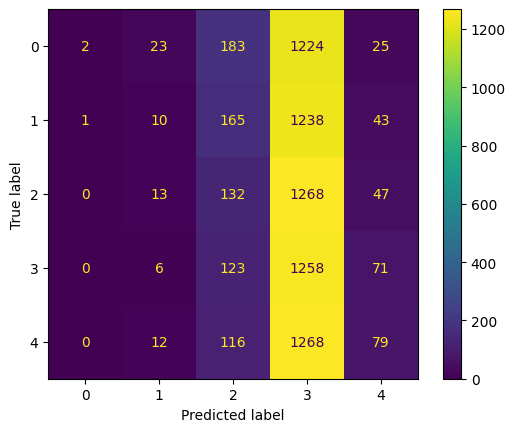

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test['label'], test['rating'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot()
plt.show()

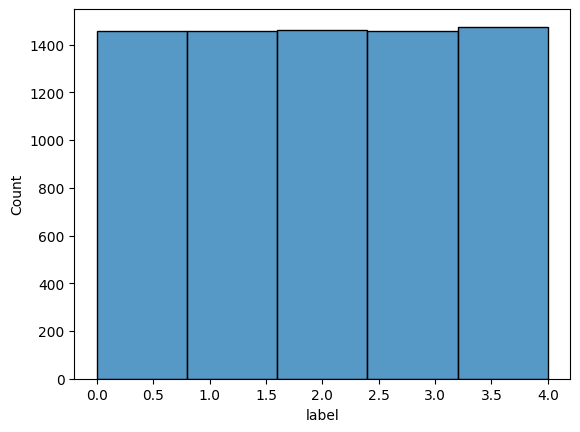

In [161]:
# plot distribution of predictions
import seaborn as sns

sns.histplot(test['label'].astype('int'), bins=5)
plt.show()
